In [20]:
import faulthandler
faulthandler.enable()


import os
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import requests
import yaml
from IPython.display import Image, display
from tardis import run_tardis
from astropy import units as u
import TARDIS_Spectrum_Filtering as tsf

In [21]:
# Run TARDIS Simulation

config_file_path = "../../tardis_example.yml"
sim = run_tardis(config_file_path,
                 virtual_packet_logging=True,
                 show_convergence_plots=False,
                 export_convergence_plots=False,
                 log_level="ERROR")

spectrum = sim.spectrum_solver.spectrum_real_packets
spectrum_virtual = sim.spectrum_solver.spectrum_virtual_packets
spectrum_integrated = sim.spectrum_solver.spectrum_integrated

BokehModel(combine_events=True, render_bundle={'docs_json': {'60d3edfe-a369-483d-8501-0316c4627ed2': {'version…

Embedding the final state for Jupyter environments
[py.warnings         ][WARNING]  /home/clyde/miniforge3/envs/tardis-installation-test/lib/python3.13/site-packages/astropy/units/format/generic.py:507: UnitsWarning:

'erg/s/Hz' contains multiple slashes, which is discouraged by the FITS standard

 (warnings.py:110)
[py.warnings         ][WARNING]  /home/clyde/miniforge3/envs/tardis-installation-test/lib/python3.13/site-packages/astropy/units/format/generic.py:507: UnitsWarning:

'erg/s/Hz' contains multiple slashes, which is discouraged by the FITS standard

 (warnings.py:110)


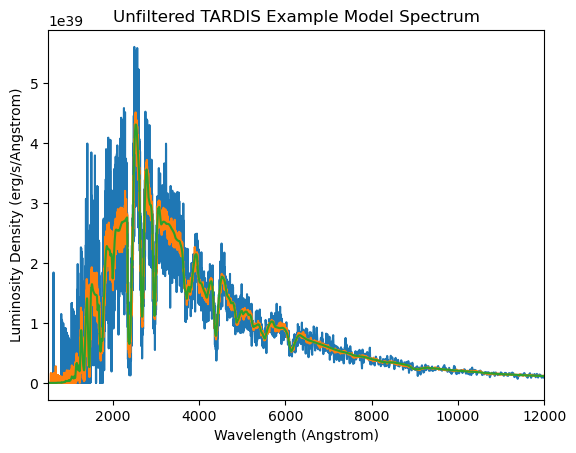

In [22]:
# Plotting the original TARTDIS Example Spectrum
tsf.plot_original_spectrum(spectrum, spectrum_virtual, spectrum_integrated)

In [23]:
# Get your filter url from the config file and download the filter
# The filter's file will be saved in the Filters/ directory if the filter URL is valid
# If the filter URL is not valid, the file will be removed and an error will be raised

url, filter_name = tsf.get_url_from_config('filter_config.yml')

tsf_filter = tsf.download_filter(url, filter_name)

Filter URL is valid.


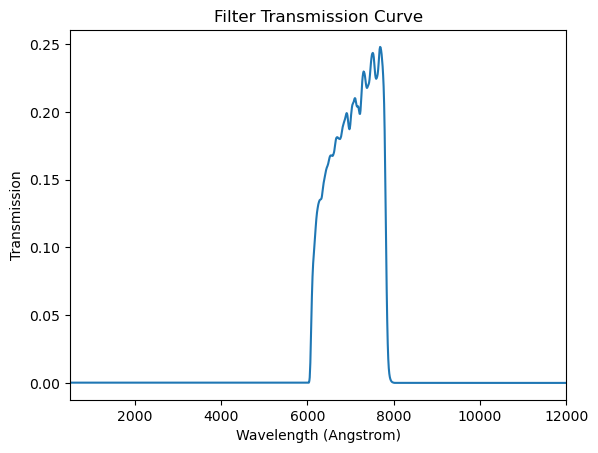

In [24]:
# Display a graph of the filter's transmission curve

tsf.plot_filter(spectrum, tsf_filter)

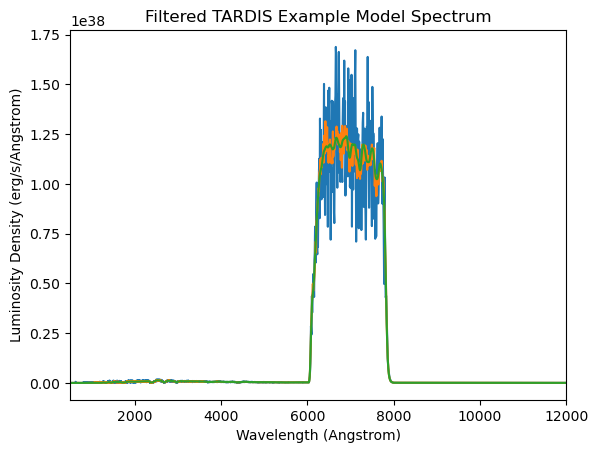

In [25]:
# Display a plot of the TARDIS Example Spectrum, as viewed through the chosen filter

tsf.plot_filtered_spectrum(spectrum, spectrum_virtual, spectrum_integrated, tsf_filter)